In [1]:
#This file presents modeling results that correspond with the visualizations in the main paper. 
#For context on the visualizations, please refer to the main paper

In [2]:
import pandas as pd
from statsmodels.formula.api import glm
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import norm


df40 = pd.read_csv('DataComb_Full.csv')
# _original = original value
# Paper_novelty, Topic_atypicality, Atypicality_of_datasets are standardized value from _original
# _log = log transfer value
df_new2 = df40[df40.NumDatasets_original>1]  #paper that use more than one dataset


subj = ['Art',
 'Biology',
 'Business',
 'Chemistry',
 'Computer_science',
 'Economics',
 'Engineering',
 'Environmental_science',
 'Geography',
 'Geology',
 'History',
 'Materials_science',
 'Mathematics',
 'Medicine',
 'Philosophy',
'Physics',
 'Political_science',
 'Psychology',
 'Sociology']

/Users/yulinyu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
df40[df40.NumDatasets_original>1].shape

(8836, 50)

In [7]:
df40.shape

(30479, 50)

In [113]:
df40.head()

,PaperId,DOI,JournalId,ImpactFactor_original,AuthorExprience_original,NumAuthor,Art,Biology,Business,Chemistry,...,Twitter_mentions,Wikipedia_mentions,Policy_mentions,news_mentions,Data_use_frequency_original,Data_use_frequency_log,Paper_novelty_original,Paper_novelty,cite5year,cite10year
0,1984060965,10.1007/s12529-010-9108-7,35573031.0,5.055556,3859.571429,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.000000,2.302585,0.795721,0.113501,10.0,19.0
1,2075702491,10.1007/s12529-015-9482-2,35573031.0,5.055556,3608.166667,6.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,4.0,362.000000,5.891644,0.719408,-0.532790,22.0,NaN
2,2085008660,10.1007/s12529-013-9324-z,35573031.0,5.055556,46205.600000,5.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,1.0,216.363636,5.376960,0.763759,-0.157180,13.0,NaN
3,2049036198,10.1007/s12529-012-9272-z,35573031.0,5.055556,87.750000,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,556.000000,6.320768,0.843375,0.517074,29.0,NaN
4,2338548203,10.1007/s12529-016-9561-z,35573031.0,5.055556,10148.500000,4.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,577.000000,6.357842,0.879894,0.826350,11.0,NaN


# Fig1

In [56]:
def regression_outcome_binaryDatacomb(df4, input1):
    if input1 =='datacomb_3':
        df1 = df4[df4.YEAR_PUB < 2020]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        #print(df1.shape)
        formula = "cite3year ~ binary_UsingMultipleDataset+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log +ImpactFactor_log+Year_bin_new+"+control
        #print(formula)
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial())
        res = res_model.fit()
        summary = res.summary2().tables[1]
        print(res.summary())
        print(res.summary().as_latex()) 

        
    if input1 =='datacomb_5':
        df1 = df4[df4.YEAR_PUB < 2018]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)        
        formula = "cite5year ~ binary_UsingMultipleDataset+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial())
        res = res_model.fit()
        summary = res.summary()
        print(res.summary())
        print(res.summary().as_latex()) 

    if input1 =='datacomb_10':
        df1 = df4[df4.YEAR_PUB < 2013]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        #print(df1.YEAR_PUB.describe())
        formula = "cite10year ~ binary_UsingMultipleDataset+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial())
        res = res_model.fit()
        summary = res.summary()
        print(res.summary())
        print(res.summary().as_latex()) 


In [55]:
def draw_multidata(df4):
    #df4 = df_new
    df1 = df4[df4.YEAR_PUB < 2020]

    df2 = df1[subj]
    df2 = df2.loc[:, (df2 != 0).any(axis=0)]
    non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
    
    control ='+'.join(non_zero_columns)
    formula = "cite3year ~ binary_UsingMultipleDataset+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
    res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop')
    res = res_model.fit()
    summary = res.summary()
    summary = res.summary2().tables[1]

    # Extracting the coefficient and the 0.975 interval value for Data_use_frequency_log
    coef_3 = summary.loc['binary_UsingMultipleDataset', 'Coef.']
    exp_3 = np.exp(coef_3)-1
    error_3 =np.exp(summary['0.975]']['binary_UsingMultipleDataset'])-np.exp(coef_3)

    df1 = df4[df4.YEAR_PUB < 2018]
    df2 = df1[subj]
    df2 = df2.loc[:, (df2 != 0).any(axis=0)]
    non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
    control ='+'.join(non_zero_columns)
    formula = "cite5year ~ binary_UsingMultipleDataset+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
    res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial())
    res = res_model.fit()
    summary = res.summary()
    summary = res.summary2().tables[1]

    # Extracting the coefficient and the 0.975 interval value for Data_use_frequency_log
    coef_5 = summary.loc['binary_UsingMultipleDataset', 'Coef.']
    exp_5 = np.exp(coef_5)-1
    error_5 = np.exp(summary['0.975]']['binary_UsingMultipleDataset'])-np.exp(coef_5)

    df1 = df4[df4.YEAR_PUB < 2013]
    
    df2 = df1[subj]
    df2 = df2.loc[:, (df2 != 0).any(axis=0)]
    non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
    control ='+'.join(non_zero_columns)
    
    formula = "cite10year ~ binary_UsingMultipleDataset+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
    res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial())
    res = res_model.fit()
    summary = res.summary()


    summary = res.summary2().tables[1]

    # Extracting the coefficient and the 0.975 interval value for Data_use_frequency_log
    coef_10 = summary.loc['binary_UsingMultipleDataset', 'Coef.']
    exp_10 = np.exp(coef_10)-1
    error_10 = np.exp(summary['0.975]']['binary_UsingMultipleDataset'])-np.exp(coef_10)

    import matplotlib.pyplot as plt

    plt.rcParams['font.family'] = 'Calibri'

    categories = [ '10 year',"5 year", '3 year']
    data_mean = [exp_10, exp_5,exp_3]
    data_error = [error_10, error_5,error_3]
    print(data_mean)

    data_mean = [x * 100 for x in data_mean]
    data_error = [x * 100 for x in data_error]

    # Define different colors for each bar
    colors = ['#c0ded9', '#ffdb58', '#7ec0ee', '#a9a9a9', '#8fbc8f']  # You can customize the colors as needed

    # Reverse the order of categories and data_mean
    categories_reversed = categories[::-1]
    data_mean_reversed = data_mean[::-1]
    data_error_reversed = data_error[::-1]

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Draw the horizontal bar chart with different colors
    ax.barh(categories_reversed, data_mean_reversed, xerr=data_error_reversed, capsize=5, color=colors, edgecolor='black')

    # Set plot labels and title
    ax.set_yticks(range(len(categories_reversed)))
    ax.set_yticklabels(categories_reversed, fontsize=25, fontweight='bold')
    ax.set_xlabel('% increase in citations (Using data combination)', fontsize=23, fontweight='bold')
    plt.xticks(rotation=0, fontsize=25, fontweight='bold')

    ax.set_xlim(0, 30)

    # Add a vertical dotted line at x = 0 for better visualization
    ax.axvline(x=0, color='black', linestyle='dotted')

    # Remove y-axis tick labels on the left-hand side
    ax.yaxis.set_ticks_position('right')
    ax.yaxis.set_label_position('right')

    # Show the plot
    plt.tight_layout()
    plt.show()


[0.13950862174790024, 0.15199059393329484, 0.17106836134134307]


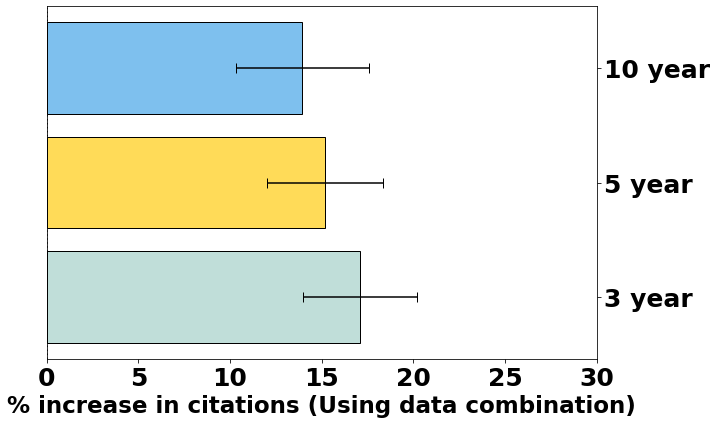

In [52]:
draw_multidata(df40)

In [45]:
#regression_outcome_binaryDatacomb(df40, 'datacomb_3')
#regression_outcome_binaryDatacomb(df40, 'datacomb_5')
#regression_outcome_binaryDatacomb(df40, 'datacomb_10')

In [49]:
def regression_outcome_numberdataset(df4, input1):
    if input1 =='datacomb_3':
        df1 = df4[df4.YEAR_PUB < 2020]
        #print(df1.shape)
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "cite3year ~ NumDatasets_original+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log +ImpactFactor_log+Year_bin_new+"+control
        #print(formula)
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial())
        res = res_model.fit()
        print(res.summary())
        print(res.summary().as_latex()) 
        summary = res.summary2().tables[1]
        coef_3 = summary.loc['NumDatasets_original', 'Coef.']
        exp_3 = np.exp(coef_3)-1
        print(exp_3)


    if input1 =='datacomb_5':
        df1 = df4[df4.YEAR_PUB < 2018]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "cite5year ~ NumDatasets_original+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial())
        res = res_model.fit()
        summary = res.summary()
        print(res.summary())
        print(res.summary().as_latex()) 
        summary = res.summary2().tables[1]
        coef_3 = summary.loc['NumDatasets_original', 'Coef.']
        exp_3 = np.exp(coef_3)-1
        print(exp_3)


    if input1 =='datacomb_10':
        df1 = df4[df4.YEAR_PUB < 2013]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        #print(df1.YEAR_PUB.describe())
        formula = "cite10year ~ NumDatasets_original+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial())
        res = res_model.fit()
        summary = res.summary()
        print(res.summary())
        print(res.summary().as_latex()) 
        summary = res.summary2().tables[1]
        coef_3 = summary.loc['NumDatasets_original', 'Coef.']
        exp_3 = np.exp(coef_3)-1
        print(exp_3)


In [50]:
#regression_outcome_numberdataset(df40, 'datacomb_3')
#regression_outcome_numberdataset(df40, 'datacomb_5')
#regression_outcome_numberdataset(df40, 'datacomb_10')

# Fig.1(Inset)

In [57]:
def year_over_binaryDatacomb_p(year_start,year_end,df4):
    df1 = df4[(df4.YEAR_PUB <= year_end)&(df4.YEAR_PUB >= year_start)]
    df2 = df1[subj]
    df2 = df2.loc[:, (df2 != 0).any(axis=0)]
    non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
    control ='+'.join(non_zero_columns)
    #print(non_zero_columns)

    formula = "cite3year ~ binary_UsingMultipleDataset+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+"+control
    res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial())
    res = res_model.fit()
    #print(res.summary())
    #print(res.summary().as_latex()) 
    summary = res.summary2().tables[1]

    # Extracting the coefficient and the 0.975 interval value for Data_use_frequency_log
    coef_3 = summary.loc['binary_UsingMultipleDataset', 'Coef.']
    exp3 = np.exp(coef_3)-1
    error_3 = np.exp(summary['0.975]']['binary_UsingMultipleDataset'])-np.exp(coef_3)
    #print(err)
    return exp3,error_3


def draw_multidata_overtime(df_new):
    coef_20,error_20= year_over_binaryDatacomb_p(2010,2020,df_new)
    coef_10,error_10= year_over_binaryDatacomb_p(2000,2010,df_new)
    coef_00,error_00= year_over_binaryDatacomb_p(1990,2000,df_new)
    coef_90,error_90= year_over_binaryDatacomb_p(0,1990,df_new)


    y1 = [coef_20,coef_10,coef_00,coef_90][::-1]
    y1_e = [error_20,error_10,error_00,error_90][::-1]
    x = ['2010-2020', '2000-2010', '1990-2000', 'before 1990'][::-1]
    data = {
        'x': ['2010-2020', '2000-2010', '1990-2000', 'before 1990'][::-1],
        'y1_mean': np.array(y1)*100,
        'y1_error': np.array(y1_e)*100,
        #'y2_mean': np.array(y2)*100,
        #'y2_error': np.array(y2_e)*100
    }

    # Create a DataFrame
    df = pd.DataFrame(data)

    # Plot the data with error bars
    plt.figure(figsize=(10, 6))

    # Line 1
    plt.errorbar(df['x'], df['y1_mean'], yerr=df['y1_error'], label='Atypicality of dataset combinations', linestyle='-', marker='o', color='#80a4a6', linewidth=5)

    # Line 2
    #plt.errorbar(df['x'], df['y2_mean'], yerr=df['y2_error'], label='Topic atypicality', linestyle='-.', marker='s', color='#80a4a6', linewidth=5)

    # Add labels and title
    plt.xlabel('Decade', fontsize=25, fontweight='bold')
    plt.ylabel('% increase in citations ', fontsize=25, fontweight='bold')
    #plt.title('Two-Line Plot with Error Bars')
    plt.axhline(y=0, color='black', linestyle='--')
    ax = plt.gca()
    ax.set_xticklabels(x, fontsize=25, fontweight='bold')  # Swap x and y
    ax.set_ylabel('% increase in citations', fontsize=25, fontweight='bold')  # Swap x and y
    plt.yticks(rotation=0, fontsize=25, fontweight='bold') 
    plt.xticks(rotation=0, fontsize=15, fontweight='bold') 
    ax.set_ylim(-20, 40)

    # Add legend
    #.legend(fontsize=15)

    # Show the plot
    plt.show()

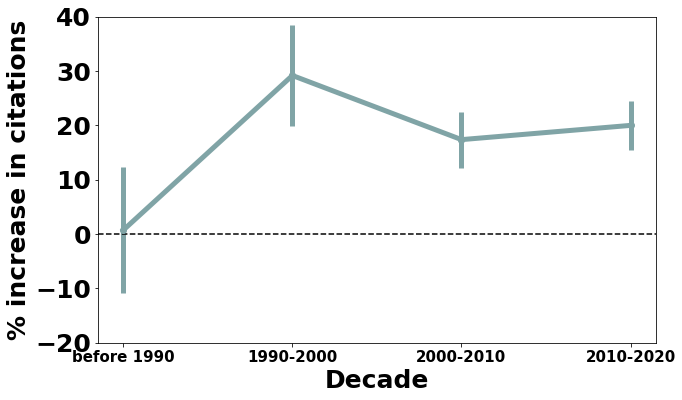

In [58]:
draw_multidata_overtime(df40)

# Fig2 (A)

In [59]:
def regression_outcome_atypcality(df4,input1):
    if input1 =='datacomb_3_main':
        df1 = df4[df4.YEAR_PUB < 2020]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "cite3year ~ Atypicality_of_datasets+NumDatasets_log+Paper_novelty+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop')
        res = res_model.fit()
       # print(res.summary())
       # print(res.summary().as_latex())
        return getcoef(res)
        
        
    if input1 =='datacomb_5_main':
        df1 = df4[df4.YEAR_PUB < 2018]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "cite5year ~ Atypicality_of_datasets+NumDatasets_log+Paper_novelty+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop')
        res = res_model.fit()
       # print(res.summary())
       # print(res.summary().as_latex())
        return getcoef(res)
        
    if input1 =='datacomb_10_main':
        df1 = df4[df4.YEAR_PUB < 2013]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "cite10year ~ Atypicality_of_datasets+NumDatasets_log+Paper_novelty+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop')
        res = res_model.fit()
       # print(res.summary())
       # print(res.summary().as_latex())
        return getcoef(res)
    #return [exp_10,error_10]

In [ ]:
#regression_outcome_atypcality(df_new2,'datacomb_3_main')
#regression_outcome_atypcality(df_new2,'datacomb_5_main')
#regression_outcome_atypcality(df_new2,'datacomb_10_main')

In [60]:
import matplotlib.pyplot as plt


def getcoef(res):
    summary = res.summary2().tables[1]
    coef_10 = summary.loc['Atypicality_of_datasets', 'Coef.']    
    exp_10 = np.exp(coef_10)-1
    error_10 = np.exp(summary['0.975]']['Atypicality_of_datasets'])-np.exp(coef_10)
    #print(exp_10)
    #print(error_10)
    return [exp_10,error_10]

def drawvisual(df4):
    df1 = df4[df4.YEAR_PUB < 2020]

    formula = "cite3year ~ Atypicality_of_datasets"
    res = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop').fit()
    Baseline = getcoef(res)
    
    i = 'NumDatasets_log'
    formula = "cite3year ~ Atypicality_of_datasets+" + i
    res = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop').fit()    
    Num_Datas = getcoef(res)
    
    i = 'Paper_novelty'
    formula = "cite3year ~ Atypicality_of_datasets+" + i
    res = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop').fit()    
    Paper_Novelty = getcoef(res)
    
    i = 'Data_use_frequency_log'
    formula = "cite3year ~ Atypicality_of_datasets+" + i
    res = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop').fit()    
    Data_Freq = getcoef(res)
    
    i = 'NumAuthor_log'
    formula = "cite3year ~ Atypicality_of_datasets+" + i
    res = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop').fit()    
    n_author = getcoef(res)
    
    i = 'AuthorExprience_log'
    formula = "cite3year ~ Atypicality_of_datasets+" + i
    res = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop').fit()    
    AuthorsExp = getcoef(res)
    
    i = 'ImpactFactor_log'
    formula = "cite3year ~ Atypicality_of_datasets+" + i
    res = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop').fit()    
    JournalCita = getcoef(res)
    
    i = 'Art+Biology+Business+Chemistry+Computer_science+Economics+Engineering+Environmental_science+Geography+Geology+History+Materials_science+Mathematics+Medicine+Philosophy+Physics+Political_science+Psychology+Sociology'
    formula = "cite3year ~ Atypicality_of_datasets+" + i
    res = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop').fit()    
    Subjects = getcoef(res)
    
    i = 'Year_bin_new'
    formula = "cite3year ~ Atypicality_of_datasets+" + i
    res = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop').fit()    
    Time_Period = getcoef(res)

    Full_Control = regression_outcome_atypcality(df4,'datacomb_3_main')

    plt.rcParams['font.family'] = 'Calibri'

    categories = ["Baseline",'Num. Datasets','Data Freq.', 'Num. of Authors','Authors Exp.', 'Journal Cita.','Time Period','Subjects','Paper Novelty','Full Control']
    data_mean= [Baseline[0],Num_Datas[0],Data_Freq[0],n_author[0],AuthorsExp[0],JournalCita[0],Time_Period[0],Subjects[0],Paper_Novelty[0],Full_Control[0]]
    data_error= [Baseline[1],Num_Datas[1],Data_Freq[1],n_author[1],AuthorsExp[1],JournalCita[1],Time_Period[1],Subjects[1],Paper_Novelty[1],Full_Control[1]]
    data_mean = [element * 100 for element in data_mean]
    data_error = [element * 100 for element in data_error]

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(20, 10))

    # Draw the forest plot
    ax.bar(categories, data_mean, yerr=data_error, capsize=5, color='#c0ded9', edgecolor='black')

    # Set plot labels and title
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, fontsize=25, fontweight='bold', rotation=90)
    ax.set_ylabel('% increase in citation(1 std incrase)', fontsize=25, fontweight='bold')
    #ax.set_title('Broader Impact', fontsize=16, fontweight='bold')
    plt.yticks(rotation=0,fontsize=25, fontweight='bold')

    ax.set_ylim(0, 25)

    # Add a horizontal dotted line at y = 0
    ax.axhline(y=0, color='black', linestyle='dotted')

    # Show the plot
    plt.show()

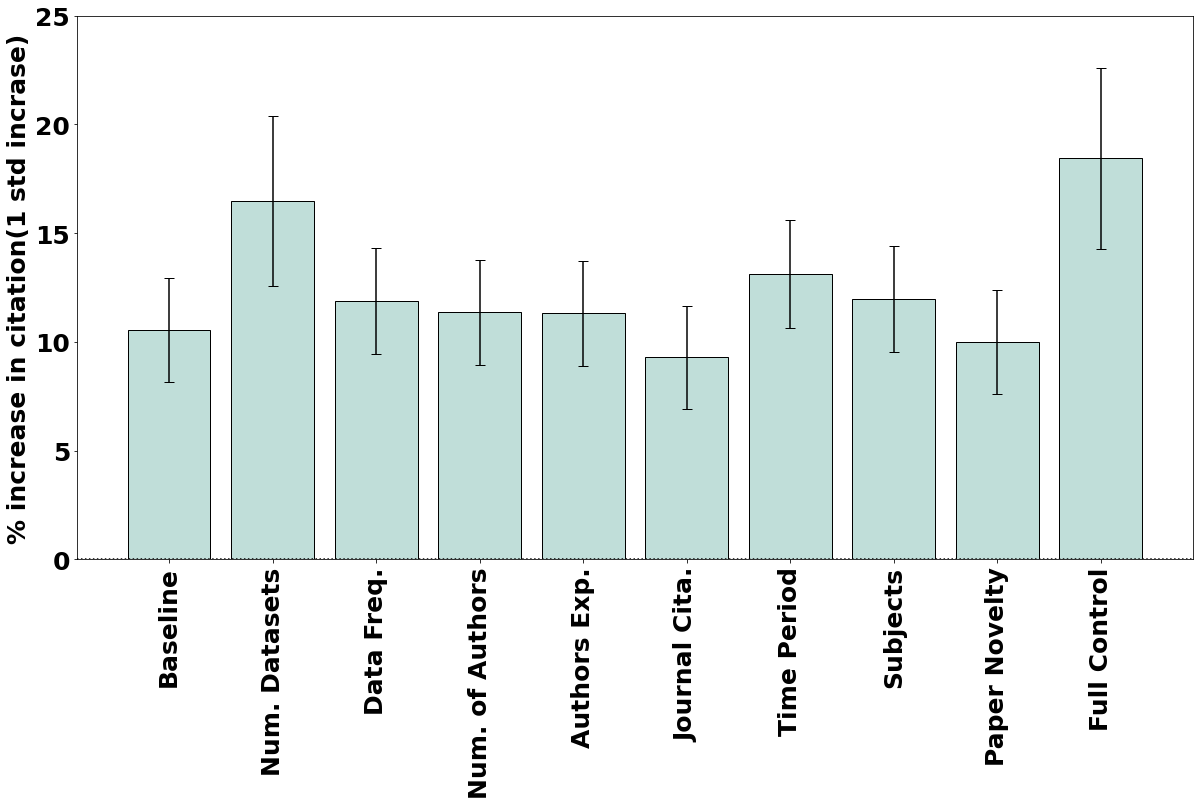

In [61]:
drawvisual(df_new2) #

# Fig2(B)

In [15]:
def atypcality_broader(df4, input1):
    if input1 =='news':
        df1 = df4[(df4.YEAR_PUB < 2020)&(df4.YEAR_PUB > 2010)]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "news_mentions ~ Atypicality_of_datasets+NumDatasets_log+Paper_novelty+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop')        
        res = res_model.fit()
        summary = res.summary()
        #print(res.summary())
        #print(res.summary().as_latex()) 
        
        summary = res.summary2().tables[1]
        # Extracting the coefficient and the 0.975 interval value for Data_use_frequency_log
        coef_10 = summary.loc['Atypicality_of_datasets', 'Coef.']    
        exp_10 = np.exp(coef_10)-1
        error_10 = np.exp(summary['0.975]']['Atypicality_of_datasets'])-np.exp(coef_10)
        return [exp_10,error_10]
        
    if input1 =='policy':
        df1 = df4[(df4.YEAR_PUB < 2020)&(df4.YEAR_PUB > 2010)]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "Policy_mentions ~ Atypicality_of_datasets+Paper_novelty+NumDatasets_log+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop')        
        res = res_model.fit()
        summary = res.summary()
        #print(res.summary())
        #print(res.summary().as_latex()) 
        
        summary = res.summary2().tables[1]
        # Extracting the coefficient and the 0.975 interval value for Data_use_frequency_log
        coef_10 = summary.loc['Atypicality_of_datasets', 'Coef.']    
        exp_10 = np.exp(coef_10)-1
        error_10 = np.exp(summary['0.975]']['Atypicality_of_datasets'])-np.exp(coef_10)
        return [exp_10,error_10]

    if input1 =='wiki':
        df1 = df4[(df4.YEAR_PUB < 2020)&(df4.YEAR_PUB > 2010)]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "Wikipedia_mentions ~ Atypicality_of_datasets+Paper_novelty+NumDatasets_log+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop')        
        res = res_model.fit()
        summary = res.summary()
        #print(res.summary())
        #print(res.summary().as_latex()) 
        summary = res.summary2().tables[1]
        # Extracting the coefficient and the 0.975 interval value for Data_use_frequency_log
        coef_10 = summary.loc['Atypicality_of_datasets', 'Coef.']    
        exp_10 = np.exp(coef_10)-1
        error_10 = np.exp(summary['0.975]']['Atypicality_of_datasets'])-np.exp(coef_10)
        return [exp_10,error_10]
        
    if input1 =='twitter':
        df1 = df4[(df4.YEAR_PUB < 2020)&(df4.YEAR_PUB > 2010)]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "Twitter_mentions ~ Atypicality_of_datasets+Paper_novelty+NumDatasets_log+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial(), missing='drop')        
        res = res_model.fit()
        summary = res.summary()
        #print(res.summary())
        #print(res.summary().as_latex()) 
        summary = res.summary2().tables[1]
        # Extracting the coefficient and the 0.975 interval value for Data_use_frequency_log
        coef_10 = summary.loc['Atypicality_of_datasets', 'Coef.']    
        exp_10 = np.exp(coef_10)-1
        error_10 = np.exp(summary['0.975]']['Atypicality_of_datasets'])-np.exp(coef_10)
        return [exp_10,error_10]
        


[76.03836343132433, 68.20830871778523, 44.63860131627302, 8.961267525434579]


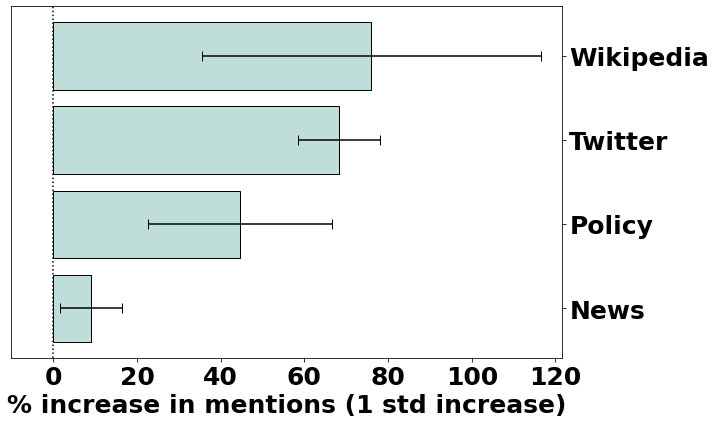

In [16]:
import matplotlib.pyplot as plt

def boardimpact_plot(df_new2):

    plt.rcParams['font.family'] = 'Calibri'

    categories = ['Wikipedia', "Twitter",'Policy',  'News']
    data_mean = [atypcality_broader(df_new2, 'wiki')[0],atypcality_broader(df_new2, 'twitter')[0], atypcality_broader(df_new2, 'policy')[0], atypcality_broader(df_new2, 'news')[0]]
    data_error = [ atypcality_broader(df_new2, 'wiki')[1],atypcality_broader(df_new2, 'twitter')[1],atypcality_broader(df_new2, 'policy')[1],atypcality_broader(df_new2, 'news')[1]]

    data_mean = [x * 100 for x in data_mean]
    print(data_mean)
    data_error =[x * 100 for x in data_error]

    # Reverse the order of categories and data_mean
    categories_reversed = categories[::-1]
    data_mean_reversed = data_mean[::-1]
    data_error_reversed = data_error[::-1]

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Draw the forest plot (horizontal bar chart)
    ax.barh(categories_reversed, data_mean_reversed, xerr=data_error_reversed, capsize=5, color='#c0ded9', edgecolor='black')

    # Set plot labels and title
    ax.set_yticks(range(len(categories_reversed)))
    ax.set_yticklabels(categories_reversed, fontsize=25, fontweight='bold')
    ax.set_xlabel('% increase in mentions (1 std increase)', fontsize=25, fontweight='bold')
    plt.xticks(rotation=0, fontsize=25, fontweight='bold')

    ax.set_xlim(-10, max(data_mean) + max(data_error) + 5)

    # Add a vertical dotted line at x = 0 for better visualization
    ax.axvline(x=0, color='black', linestyle='dotted')

    # Remove y-axis tick labels on the left-hand side
    ax.yaxis.set_ticks_position('right')
    ax.yaxis.set_label_position('right')


    # Show the plot
    plt.tight_layout()
    plt.show()
    
boardimpact_plot(df_new2)

# Fig3(B)

In [103]:
def topic_atypcality_t(df4, input1):
    if input1 =='datacomb_3':
        df1 = df4[df4.YEAR_PUB < 2020]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "cite3year ~ Atypicality_of_datasets+Topic_atypicality+Paper_novelty+NumDatasets_log+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial(alpha=0.25), missing='drop')       
        res = res_model.fit()
        summary = res.summary()
        #print(res.summary())
        #print(res.summary().as_latex()) 
        summary = res.summary2().tables[1]
        # Extracting the coefficient and the 0.975 interval value for Data_use_frequency_log
        
        
        coef_10 = summary.loc['Atypicality_of_datasets', 'Coef.']    
        exp_10 = np.exp(coef_10)-1
        error_10 = np.exp(summary['0.975]']['Atypicality_of_datasets'])-np.exp(coef_10)
        
        coef_10_t = summary.loc['Topic_atypicality', 'Coef.']    
        exp_10_t = np.exp(coef_10_t)-1
        error_10_t = np.exp(summary['0.975]']['Topic_atypicality']) - np.exp(coef_10_t)

        return [exp_10,error_10,exp_10_t,error_10_t]
        
    if input1 =='datacomb_5':
        df1 = df4[df4.YEAR_PUB < 2018]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "cite5year ~ Atypicality_of_datasets+Topic_atypicality+Paper_novelty+NumDatasets_log+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial(alpha=0.25), missing='drop')       
        res = res_model.fit()
        summary = res.summary()
        #print(res.summary())
       # print(res.summary().as_latex()) 
        
        
        summary = res.summary2().tables[1]
        # Extracting the coefficient and the 0.975 interval value for Data_use_frequency_log
        coef_10 = summary.loc['Atypicality_of_datasets', 'Coef.']    
        exp_10 = np.exp(coef_10)-1
        error_10 = np.exp(summary['0.975]']['Atypicality_of_datasets'])-np.exp(coef_10)
        
        coef_10_t = summary.loc['Topic_atypicality', 'Coef.']    
        exp_10_t = np.exp(coef_10_t)-1
        error_10_t = np.exp(summary['0.975]']['Topic_atypicality']) - np.exp(coef_10_t)
        return [exp_10,error_10,exp_10_t,error_10_t]

    if input1 =='datacomb_10':
        df1 = df4[df4.YEAR_PUB < 2013]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "cite10year ~ Atypicality_of_datasets+Topic_atypicality+Paper_novelty+NumDatasets_log+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial(alpha=0.25), missing='drop')       
        res = res_model.fit()
        summary = res.summary()
        #print(res.summary())
        #print(res.summary().as_latex()) 
                
        summary = res.summary2().tables[1]
        # Extracting the coefficient and the 0.975 interval value for Data_use_frequency_log
        coef_10 = summary.loc['Atypicality_of_datasets', 'Coef.']    
        exp_10 = np.exp(coef_10)-1
        error_10 = np.exp(summary['0.975]']['Atypicality_of_datasets'])-np.exp(coef_10)
        
        coef_10_t = summary.loc['Topic_atypicality', 'Coef.']    
        exp_10_t = np.exp(coef_10_t)-1
        error_10_t = np.exp(summary['0.975]']['Topic_atypicality']) - np.exp(coef_10_t)
        #print(exp_t)
        return [exp_10,error_10,exp_10_t,error_10_t]

[[0.17519771 0.18126578 0.18350331]
 [0.03968529 0.03607864 0.04355761]]


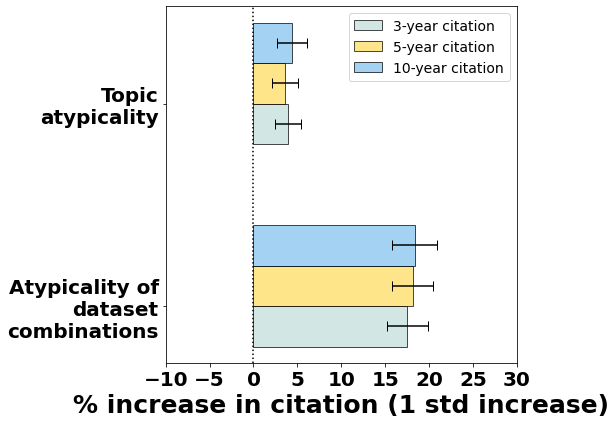

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Define the categories and data

def aty_topic_plot(df_new2):
    t3 = topic_atypcality_t(df_new2, 'datacomb_3')
    t5 = topic_atypcality_t(df_new2, 'datacomb_5')
    t10 = topic_atypcality_t(df_new2, 'datacomb_10')



    categories = ['Atypicality of dataset combinations', "Topic atypicality"]
    data = np.array([[t3[0],t5[0], t10[0]], [t3[2], t5[2], t10[2]]])  # Replace with your actual data
    print(data)
    data = data* 100
    # Set the height of the bars
    bar_height = 0.2

    # Create an array of indices for the categories
    y = np.arange(len(categories))

    # Define a custom color palette with additional colors if needed
    custom_colors = ['#c0ded9', '#ffdb58', '#7ec0ee', '#a9a9a9', '#8fbc8f']  # Add more colors if needed

    leg = ['3-year citation','5-year citation','10-year citation']

    # Define error data with three values for each category
    error_data = np.array([[t3[1],t5[1], t10[1]], 
                           [t3[3], t5[3], t10[3]]])

    # Multiply each value by 100
    error_data = error_data * 100
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot multiple bars with error bars for each category using custom colors and error data
    num_bars = data.shape[1]
    for i in range(num_bars):
        for j in range(len(categories)):
            ax.barh(y[j] - bar_height / 2 + i * bar_height, data[j, i], height=bar_height, 
                    label=leg[i] if j == 0 else None, 
                    color=custom_colors[i % len(custom_colors)],
                    xerr=error_data[j, i], capsize=5, alpha=0.7, edgecolor='black')

    # Set the y-axis ticks and labels
    ax.set_yticks(y)
    ax.set_yticklabels(categories)

    # Add labels and title
    ax.set_xlabel('% increase in citation (1 std increase)', fontsize=25, fontweight='bold')
    plt.xticks(rotation=0, fontsize=20, fontweight='bold')
    ax.set_xlim(-10, 30)
    ax.axvline(x=0, color='black', linestyle='dotted')


    wrapped_labels = [textwrap.fill(label, 15) for label in categories]
    ax.set_yticklabels(wrapped_labels, fontsize=20, fontweight='bold')
    # Add a legend
    ax.legend(fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()


aty_topic_plot(df_new2)

# Fig3(C)

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


[0.09979716178964648, 0.12411560256496124, 0.20731776501703636, 0.19735651434604473]
[-0.015570854232039744, 0.06536049906436125, 0.020167891239658564, 0.06007792480993657]


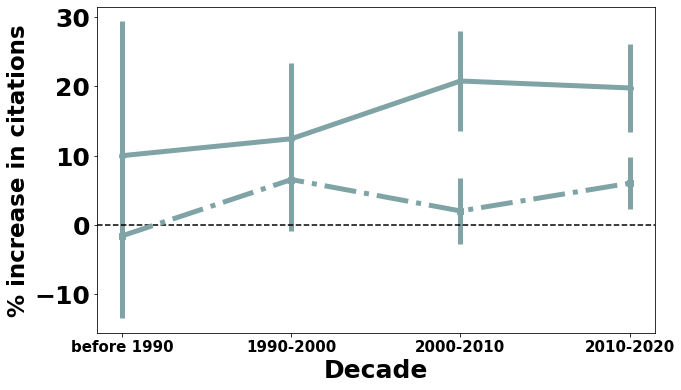

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


def year_atyplicality(year_start,year_end,df4):
    df1 = df4[(df4.YEAR_PUB <= year_end)&(df4.YEAR_PUB >= year_start)]
    df2 = df1[subj]
    df2 = df2.loc[:, (df2 != 0).any(axis=0)]
    non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
    control ='+'.join(non_zero_columns)
    formula = "cite3year ~ Atypicality_of_datasets+Topic_atypicality+NumDatasets_log+Paper_novelty+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+"+control
    res_model = glm(formula, data=df1, family=sm.families.NegativeBinomial())
    res = res_model.fit()
    
    
    
    #print(res.summary())
    #print(res.summary().as_latex())
    summary = res.summary2().tables[1]
    # Extracting the coefficient and the 0.975 interval value for Data_use_frequency_log
    coef_10 = summary.loc['Atypicality_of_datasets', 'Coef.']    
    exp_10 = np.exp(coef_10)-1
    error_10 = np.exp(summary['0.975]']['Atypicality_of_datasets']) - np.exp(coef_10)

    coef_10_t = summary.loc['Topic_atypicality', 'Coef.']    
    exp_10_t = np.exp(coef_10_t)-1
    error_10_t = np.exp(summary['0.975]']['Topic_atypicality'])-np.exp(coef_10_t)
    return exp_10,error_10,exp_10_t,error_10_t

# Sample data

def draw_topic_overtime(df0):
    coef_20,error_20,coef_t_20,error_t_20= year_atyplicality(2010,2020,df0)
    coef_10,error_10,coef_t_10,error_t_10= year_atyplicality(2000,2010,df0)
    coef_00,error_00,coef_t_00,error_t_00= year_atyplicality(1990,2000,df0)
    coef_90,error_90,coef_t_90,error_t_90= year_atyplicality(0,1990,df0)


    y1 = [coef_20,coef_10,coef_00,coef_90][::-1]
    y2 = [coef_t_20,coef_t_10,coef_t_00, coef_t_90][::-1]
    y1_e = [error_20,error_10,error_00,error_90][::-1]
    y2_e = [error_t_20,error_t_10,error_t_00,error_t_90][::-1]
    
    print(y1)
    print(y2)
    
    x = ['2010-2020', '2000-2010', '1990-2000', 'before 1990'][::-1]
    

    data = {
        'x': ['2010-2020', '2000-2010', '1990-2000', 'before 1990'][::-1],
        'y1_mean': np.array(y1)*100,
        'y1_error': np.array(y1_e)*100,
        'y2_mean': np.array(y2)*100,
        'y2_error': np.array(y2_e)*100
    }

    # Create a DataFrame
    df = pd.DataFrame(data)

    # Plot the data with error bars
    plt.figure(figsize=(10, 6))

    # Line 1
    plt.errorbar(df['x'], df['y1_mean'], yerr=df['y1_error'], label='Atypicality of dataset combinations', linestyle='-', marker='o', color='#80a4a6', linewidth=5)

    # Line 2
    plt.errorbar(df['x'], df['y2_mean'], yerr=df['y2_error'], label='Topic atypicality', linestyle='-.', marker='s', color='#80a4a6', linewidth=5)

    # Add labels and title
    plt.xlabel('Decade', fontsize=25, fontweight='bold')
    plt.ylabel('% increase in citations ', fontsize=25, fontweight='bold')
    #plt.title('Two-Line Plot with Error Bars')
    plt.axhline(y=0, color='black', linestyle='--')
    ax = plt.gca()
    ax.set_xticklabels(x, fontsize=25, fontweight='bold')  # Swap x and y
    ax.set_ylabel('% increase in citations', fontsize=23, fontweight='bold')  # Swap x and y
    plt.yticks(rotation=0, fontsize=25, fontweight='bold') 
    plt.xticks(rotation=0, fontsize=15, fontweight='bold') 


    # Add legend
    #plt.legend(fontsize=15)

    # Show the plot
    plt.show()
draw_topic_overtime(df_new2)

# Fig4(A)

In [27]:
df_new = df40
import statsmodels.formula.api as smf
#df_new['binary_UsingMultipleDataset'] = df_new['binary_UsingMultipleDataset'].astype(int)

def regression_whocomb(df4, input1):
    if input1 =='NumAuthor_Combdata':
        df1 = df4[df4.YEAR_PUB < 2020]
        log_reg = smf.logit("binary_UsingMultipleDataset ~ NumAuthor_log + Data_use_frequency_log + ImpactFactor_log", data=df_new).fit()

       # print(log_reg.summary())
       # print(log_reg.summary().as_latex())
        
        summary = log_reg.summary2().tables[1]
        
        coef_10 = summary.loc['NumAuthor_log', 'Coef.']
        error_10= summary['0.975]']['NumAuthor_log']-summary.loc['NumAuthor_log', 'Coef.']
        return [coef_10,error_10]
        
    if input1 =='AuthorExp_Combdata':
        df1 = df4[df4.YEAR_PUB < 2020]
        log_reg = smf.logit("binary_UsingMultipleDataset ~ AuthorExprience_log + Data_use_frequency_log + ImpactFactor_log", data=df_new).fit()

        #print(log_reg.summary())
        #print(log_reg.summary().as_latex())
        
        summary = log_reg.summary2().tables[1]
        
        coef_10 = summary.loc['AuthorExprience_log', 'Coef.']
        error_10= summary['0.975]']['AuthorExprience_log']-summary.loc['AuthorExprience_log', 'Coef.']
        return [coef_10,error_10]
        
    if input1 =='NumAuthor_Atyplical':
        df1 = df4[df4.YEAR_PUB < 2020]
        log_reg = smf.ols("Atypicality_of_datasets ~ NumAuthor_log +NumDatasets_log + Data_use_frequency_log+ImpactFactor_log", data=df_new2).fit()

        #print(log_reg.summary())
        #print(log_reg.summary().as_latex())
        
        summary = log_reg.summary2().tables[1]
        
        coef_10 = summary.loc['NumAuthor_log', 'Coef.']
        error_10= summary['0.975]']['NumAuthor_log']-summary.loc['NumAuthor_log', 'Coef.']
        return [coef_10,error_10]
        
    if input1 =='NAuthorExp_Atyplical':
        df1 = df4[df4.YEAR_PUB < 2020]
        log_reg = smf.ols("Atypicality_of_datasets ~ AuthorExprience_log +NumDatasets_log + Data_use_frequency_log+ImpactFactor_log", data=df_new2).fit()

       # print(log_reg.summary())
        #print(log_reg.summary().as_latex())
        
        summary = log_reg.summary2().tables[1]
        
        coef_10 = summary.loc['AuthorExprience_log', 'Coef.']
        error_10= summary['0.975]']['AuthorExprience_log']-summary.loc['AuthorExprience_log', 'Coef.']
        return [coef_10,error_10]

In [28]:
# import matplotlib.pyplot as plt
import textwrap


def draw_numauthor_comb(df_new,df_new2):
    n_auth_comb,n_auth_comb_err =  regression_whocomb(df_new, 'NumAuthor_Combdata')
    n_auth_aty,n_auth_aty_err =  regression_whocomb(df_new2, 'NumAuthor_Atyplical')


    categories = ['Atypicality of Dataset Combination', "Use Multiple Datasets"]
    # Wrap text after 20 characters for each label in the categories
    categories = ['\n'.join(textwrap.wrap(c, 15)) for c in categories]

    data_mean = [n_auth_aty,n_auth_comb]
    data_error = [n_auth_aty_err,n_auth_comb_err]

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(10,6))

    # Draw the forest plot
    ax.barh(categories, data_mean, xerr=data_error, capsize=5, color='#c0ded9', edgecolor='black')

    # Set plot labels and title
    ax.set_yticks(range(len(categories)))
    ax.set_yticklabels(categories,fontsize=20, fontweight='bold')
    ax.set_xlabel('Teamsize',fontsize=20, fontweight='bold')
    plt.xticks(rotation=0,fontsize=20, fontweight='bold')

    ax.set_xlim(-0.2, 0.2)

    # Add a vertical dotted line at x = 0
    ax.axvline(x=0, color='black', linestyle='dotted')

    # Show the plot
    plt.show()

Optimization terminated successfully.
         Current function value: 0.600197
         Iterations 5


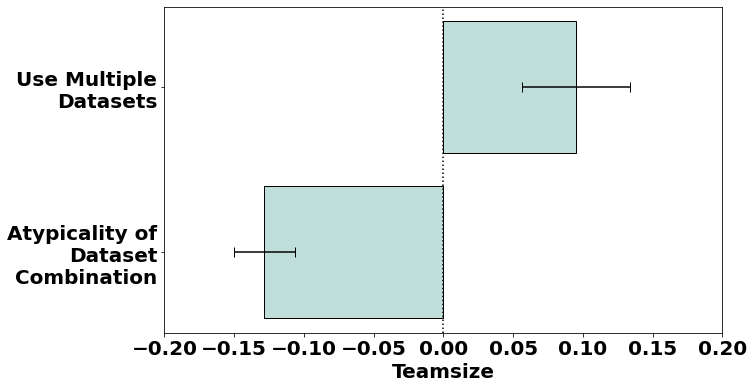

In [29]:
df_new = df40
draw_numauthor_comb(df_new,df_new2)

# Fig4(B)

In [31]:
def draw_autexp_comb(df_new,df_new2):
    n_auth_comb,n_auth_comb_err =  regression_whocomb(df_new, 'AuthorExp_Combdata')
    n_auth_aty,n_auth_aty_err =  regression_whocomb(df_new2, 'NAuthorExp_Atyplical')


    categories = ['Atypicality of Dataset Combination', "Use Multiple Datasets"]
    # Wrap text after 20 characters for each label in the categories
    categories = ['\n'.join(textwrap.wrap(c, 15)) for c in categories]

    data_mean = [n_auth_aty,n_auth_comb]
    data_error = [n_auth_aty_err,n_auth_comb_err]

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(10,6))

    # Draw the forest plot
    ax.barh(categories, data_mean, xerr=data_error, capsize=5, color='#c0ded9', edgecolor='black')

    # Set plot labels and title
    ax.set_yticks(range(len(categories)))
    ax.set_yticklabels(categories,fontsize=20, fontweight='bold')
    ax.set_xlabel('Team Experience',fontsize=20, fontweight='bold')
    plt.xticks(rotation=0,fontsize=20, fontweight='bold')

    ax.set_xlim(-0.06, 0.06)

    # Add a vertical dotted line at x = 0
    ax.axvline(x=0, color='black', linestyle='dotted')

    # Show the plot
    plt.show()

Optimization terminated successfully.
         Current function value: 0.600573
         Iterations 5


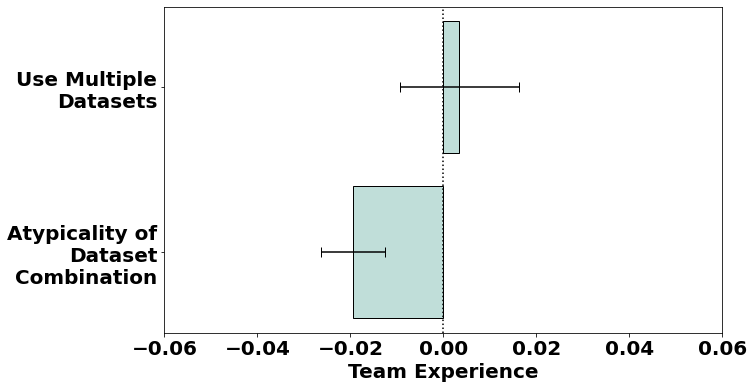

In [32]:
draw_autexp_comb(df_new,df_new2)

In [105]:
# ------ STOP HERE -------

In [106]:
# Other robustness task: 

#threshold = df_new2['cite3year'].quantile(0.95)
#df_new2['top_5_hit_paper'] = (df_new2['cite3year'] >= threshold).astype(int)

In [ ]:
def regression_outcome_5(df4, input1):
    if input1 =='datacomb_3_main':
        df1 = df4[df4.YEAR_PUB < 2020]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "top_5_hit_paper ~ 0+Atypicality_of_datasets+NumDatasets_log+Paper_novelty+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res = glm(formula, data=df4, family=sm.families.Binomial(link=sm.families.links.logit())).fit()
        summary = res.summary()
        #print(res.summary())
        #print(res.summary().as_latex()) 


def regression_outcome_5_topic(df4, input1):
    if input1 =='datacomb_3_main':
        df1 = df4[df4.YEAR_PUB < 2020]
        df2 = df1[subj]
        df2 = df2.loc[:, (df2 != 0).any(axis=0)]
        non_zero_columns = df2.columns[(df2 != 0).any(axis=0)].tolist()
        control ='+'.join(non_zero_columns)
        formula = "top_5_hit_paper ~ 0+Atypicality_of_datasets+Topic_atypicality+NumDatasets_log+Paper_novelty+Data_use_frequency_log+NumAuthor_log+AuthorExprience_log+ImpactFactor_log+Year_bin_new+"+control
        res = glm(formula, data=df4, family=sm.families.Binomial(link=sm.families.links.logit())).fit()
        summary = res.summary()
        #print(res.summary())
        #print(res.summary().as_latex()) 
regression_outcome_5(df_new2, 'datacomb_3_main')